In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import skimage.color as sColor
import skimage.io as io


In [2]:
#Importing the set of images
images = io.imread_collection('annunc\*.jpg' )

In [22]:
#Passing from RGB to HSV 
hsvImages = []
for image in tqdm(images) :
    hsvImages.append(sColor.convert_colorspace(image, 'RGB','HSV'))

100%|██████████████████████████████████████| 2787/2787 [00:58<00:00, 48.00it/s]


In [ ]:
#plotting the hue / sat / value for the first image 
hue, sat, val = hsvImages[0][:,:,0], hsvImages[0][:,:,1], hsvImages[0][:,:,2]
plt.figure(figsize=(15,10))
plt.subplot(311)                            
plt.subplots_adjust(hspace=.5)
plt.title("Hue")
plt.hist(np.ndarray.flatten(hue))
plt.subplot(312)                            
plt.title("Saturation")
plt.hist(np.ndarray.flatten(sat))
plt.subplot(313)                             
plt.title("Luminosity Value")
plt.hist(np.ndarray.flatten(val))
plt.show()

In [ ]:
#mapping the image with its average hue value
imageMap= [];
for image in tqdm(hsvImages) :
    hue, sat, val = image[:,:,0], image[:,:,1], image[:,:,2]
    hues = np.ndarray.flatten(hue);
    imageMap.append((image, hues.mean()))
    

In [ ]:
#sorting the map by the average hue value
def getKey(item):
    return item[1]
sortedMap =sorted(imageMap, key=getKey)


In [ ]:
sortedImages =[]
for img in sortedMap) :
    sortedImages.append(img[0])
rgbImages = []
for image in tqdm(sortedImages) :
    rgb = sColor.convert_colorspace(image, 'HSV','RGB')
    rgbImages.append(rgb)


In [ ]:
bigImage = np.zeros((22*400,128*200,3))
for i in tqdm(range(len(rgbImages))):
    bigImage[int(i/128)*400:(int(i/128)+1)*400,int(i%128)*200:(int(i%128)+1)*200] = rgbImages[i]


In [ ]:
io.imsave('val.jpg',bigImage)

In [3]:

def sortBy(images, sortingParam) :
    #convert RGB images to HSV images
    hsvImages = []
    for image in images :
        hsvImages.append(sColor.convert_colorspace(image, 'RGB','HSV'))
    
    #Compute the mean of the selected parameter for each image
    imageMap= [];
    for image in hsvImages :
        if(sortingParam == 'hue') :
            imageHue = image[:,:,0]
            hues = np.ndarray.flatten(imageHue);
            imageMap.append((image, hues.mean()))
        if(sortingParam == 'sat') :
            imageSat = image[:,:,1]
            sats = np.ndarray.flatten(imageSat);
            imageMap.append((image, sats.mean()))        
        if(sortingParam == 'val') :
            imageVal = image[:,:,2]
            vals = np.ndarray.flatten(imageVal);
            imageMap.append((image, vals.mean()))
    
    #Sort the list of images by mean (ascending)
    def getKey(item):
        return item[1]
    sortedMap =sorted(imageMap, key=getKey)
    
    #Select the images from the sorted map and convert back to rgb
    rgbImages = []
    for img in sortedMap :
        rgbIm = sColor.convert_colorspace(img[0], 'HSV','RGB')
        rgbImages.append(rgbIm)
        
    return rgbImages;

def make_as_1D_grid(images,rows,cols):
    canvas = np.zeros((rows*400,cols*200,3))
    for i in range(len(images)):
        canvas[int(i/cols)*400:(int(i/cols)+1)*400,int(i%cols)*200:(int(i%cols)+1)*200] = images[i]
    return canvas;
  

In [4]:
sats = sortBy(images,'sat')
sats = make_as_1D_grid(sats,22,128)

In [7]:
io.imsave('test.jpg',sats)

C:\Users\Robin\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [ ]:
vals= sortBy(images,22,128,'val')

In [ ]:
io.imsave('vals.jpg',vals)


In [ ]:
#########################Tests############################
bigImg = np.concatenate((rgbImages[int(4*i):int(4*i)+4]), axis=1)
for i in range(1,4):
    np.concatenate((bigImg, np.concatenate((rgbImages[int(4*i):int(4*i)+4]), axis=1)), axis=0)

In [14]:
def sortByT(images,sortingParam) :
    #convert RGB images to HSV images
    hsvImages = []
    for image in images :
        hsv = sColor.convert_colorspace(image, 'RGB','HSV')
        if(sortingParam == 'hue') :
            imageHue = hsv[:,:,0]
            val = np.ndarray.flatten(imageHue);
        if(sortingParam == 'sat') :
            imageSat = hsv[:,:,1]
            val = np.ndarray.flatten(imageSat);
        if(sortingParam == 'val') :
            imageVal = hsv[:,:,2]
            val = np.ndarray.flatten(imageVal);
        hsvImages.append((image,val.mean()))
        
    #Sort the list of images by mean (ascending)
    def getKey(item):
        return item[1]
    
    sortedMap =sorted(hsvImages, key=getKey)
    
    #Select the images from the sorted map and scale them from [0:255] to [0:1]
    rgbImages = []
    for img in sortedMap :
        rgbImages.append(img[0]/255.0)
        
    return rgbImages;


def make_as_1D_grid(images,rows,cols):
    canvas = np.zeros((rows*400,cols*200,3))
    for i in range(len(images)):
        canvas[int(i/cols)*400:(int(i/cols)+1)*400,int(i%cols)*200:(int(i%cols)+1)*200] = images[i]
    return canvas;

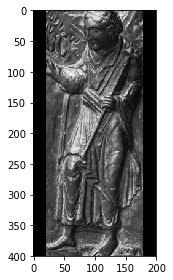

In [15]:
sat = sortByT(images,'sat')

io.imshow(sat[0])

In [16]:
for img in sat :
    if np.min(img)<-1 or np.max(img)>1:
        print(np.max(img))
        break

In [17]:
test= make_as_1D_grid(sat,22,128)

C:\Users\Robin\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


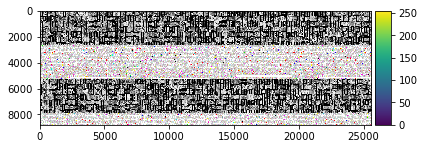

In [13]:
io.imshow(test)

In [18]:
io.imsave('test.jpg',test)

C:\Users\Robin\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
